# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [1]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install plotly
%pip install sklearn
%pip install statsmodels
%pip install folium


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 42.7 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 31.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 503.5/503.5 kB 25.8 MB/s eta 0:00:00

[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 42.9 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 60.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 39.7 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 944.1/944.1 kB 43.2 MB/s eta 0:00:00

[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import folium
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import tree
import pickle

In [4]:
url='https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv'
df_raw=pd.read_csv(url)
df_raw.shape

(768, 9)

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df_raw.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
541,3,128,72,25,190,32.4,0.549,27,1
197,3,107,62,13,48,22.9,0.678,23,1
252,2,90,80,14,55,24.4,0.249,24,0
178,5,143,78,0,0,45.0,0.190,47,0
426,0,94,0,0,0,0.0,0.256,25,0


In [7]:
df_raw.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df_filter = df_raw.copy()
df_filter = df_raw[(df_raw["BMI"] > 0 ) & (df_raw["BloodPressure"] > 0) & (df_raw["Glucose"] > 0)]
df_filter

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Remuevo los valores que tienen BMI, BloodPressure y Glucose igual a 0. Aqui borro 44 observaciones

**EDA**

In [10]:
df = df_filter.copy() 

In [11]:
# Split the dataset 

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=208)

In [12]:
# Join the train sets to ease insights

df_train = pd.concat([X_train, y_train], axis=1)

In [13]:
# Get basic info

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 543 entries, 391 to 441
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               543 non-null    int64  
 1   Glucose                   543 non-null    int64  
 2   BloodPressure             543 non-null    int64  
 3   SkinThickness             543 non-null    int64  
 4   Insulin                   543 non-null    int64  
 5   BMI                       543 non-null    float64
 6   DiabetesPedigreeFunction  543 non-null    float64
 7   Age                       543 non-null    int64  
 8   Outcome                   543 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 42.4 KB


In [15]:
# Describe the numerical and date variables

df_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000
mean,3.861878,122.340700,72.565378,21.305709,87.895028,32.591713,0.464265,33.552486,0.349908
std,3.294477,31.384709,12.557868,15.872488,123.404706,7.015333,0.336704,11.767290,0.477380
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.084000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.550000,0.238000,24.000000,0.000000
50%,3.000000,118.000000,72.000000,23.000000,48.000000,32.400000,0.361000,29.000000,0.000000
75%,6.000000,143.000000,80.000000,33.000000,135.000000,36.600000,0.600000,41.000000,1.000000
max,17.000000,197.000000,122.000000,99.000000,846.000000,67.100000,2.420000,68.000000,1.000000


In [14]:
# Take a sample

df_train.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
41,7,133,84,0,0,40.2,0.696,37,0
247,0,165,90,33,680,52.3,0.427,23,0
556,1,97,70,40,0,38.1,0.218,30,0
107,4,144,58,28,140,29.5,0.287,37,0
548,1,164,82,43,67,32.8,0.341,50,0
483,0,84,82,31,125,38.2,0.233,23,0
313,3,113,50,10,85,29.5,0.626,25,0
360,5,189,64,33,325,31.2,0.583,29,1
280,0,146,70,0,0,37.9,0.334,28,1
600,1,108,88,19,0,27.1,0.400,24,0


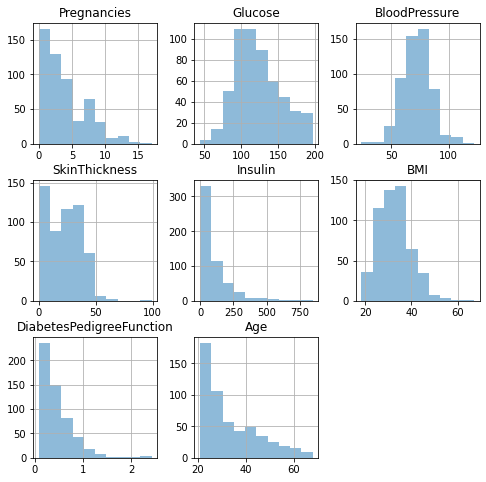

In [16]:
# Perform univariate analysis - histograms

X_train.hist(figsize=(8,8), alpha=0.5)
plt.show()

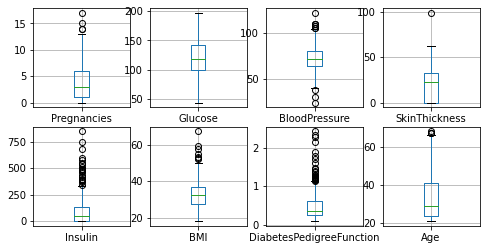

In [17]:
# Perform univariate analysis - boxplots

fig, ax = plt.subplots(2,4, figsize=(8,4))
axs = ax.flatten()
for i in range(len(axs)):
    X_train._get_numeric_data().iloc[:,i].to_frame().boxplot(ax=axs[i])

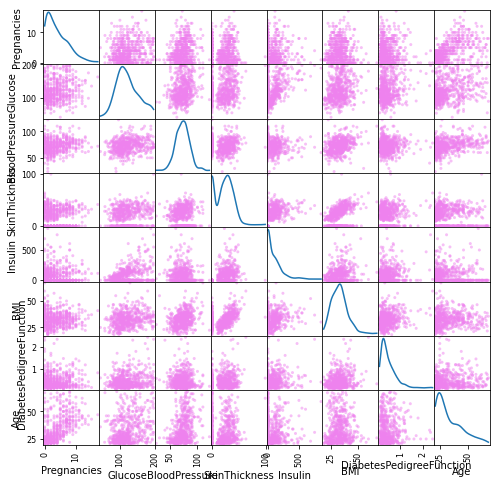

In [18]:
# Perform bivariate analysis - numericals

pd.plotting.scatter_matrix(X_train, diagonal='kde', figsize=(8,8), c='Violet')
plt.show()

<AxesSubplot:>

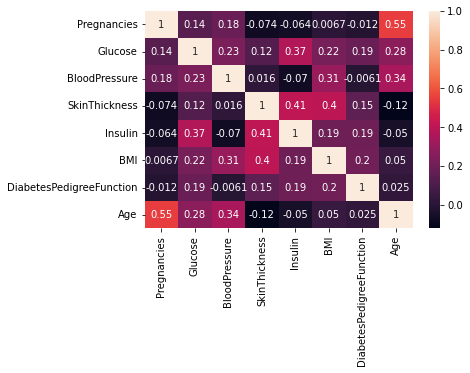

In [19]:
sns.heatmap(X_train.corr(),annot=True)

In [20]:
# Target variable

df_train['Outcome'].value_counts()

0    353
1    190
Name: Outcome, dtype: int64

In [21]:
# Analyze effect on response variable (DV)

df_train.corr().style.background_gradient(cmap='Blues')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.141032,0.181614,-0.074380,-0.063679,0.006720,-0.011776,0.548761,0.206758
Glucose,0.141032,1.000000,0.226965,0.120854,0.371774,0.219716,0.185622,0.277676,0.495939
BloodPressure,0.181614,0.226965,1.000000,0.015515,-0.069931,0.305147,-0.006090,0.343670,0.154369
SkinThickness,-0.074380,0.120854,0.015515,1.000000,0.407616,0.402478,0.154991,-0.120581,0.110039
Insulin,-0.063679,0.371774,-0.069931,0.407616,1.000000,0.194325,0.190934,-0.050034,0.155183
BMI,0.006720,0.219716,0.305147,0.402478,0.194325,1.000000,0.199888,0.050117,0.277649
DiabetesPedigreeFunction,-0.011776,0.185622,-0.006090,0.154991,0.190934,0.199888,1.000000,0.024882,0.225779
Age,0.548761,0.277676,0.343670,-0.120581,-0.050034,0.050117,0.024882,1.000000,0.244699
Outcome,0.206758,0.495939,0.154369,0.110039,0.155183,0.277649,0.225779,0.244699,1.000000


La glucosa y el BMI tienen una correlación relativamente alta con la variable objetivo.

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

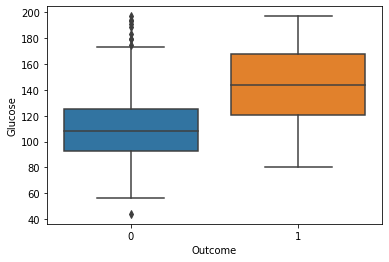

In [22]:
sns.boxplot(x="Outcome", y="Glucose", data=df_train)

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

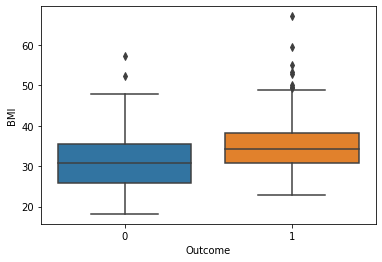

In [23]:
sns.boxplot(x="Outcome", y="BMI", data=df_train)

La glucosa parece ser una característica útil para separar a las personas con y sin diabetes.

**Decision Tree**

Model 1

In [24]:
clf = DecisionTreeClassifier(criterion='entropy',random_state=0)

clf.fit(X_train, y_train)

print('Accuracy model 1 - train set:', clf.score(X_train, y_train))
print('Accuracy model 1 - test set:', clf.score(X_test, y_test))

Accuracy model 1 - train set: 1.0
Accuracy model 1 - test set: 0.6961325966850829


In [25]:
clf_pred=clf.predict(X_test)

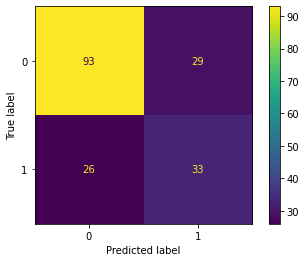

In [26]:
cm = confusion_matrix(y_test, clf_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=clf.classes_)
disp.plot()

plt.show()

In [27]:
#Classification report - Model 1

print(classification_report(y_test,clf_pred))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       122
           1       0.53      0.56      0.55        59

    accuracy                           0.70       181
   macro avg       0.66      0.66      0.66       181
weighted avg       0.70      0.70      0.70       181



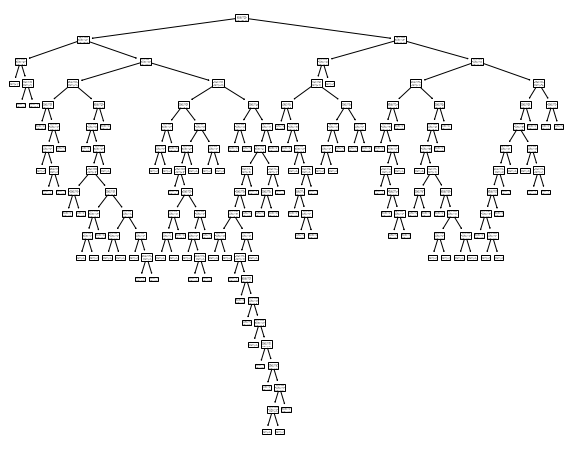

In [30]:
plt.figure(figsize=(10,8))
tree.plot_tree(clf)
plt.show()

Este modelo parece sobreajustar los datos: el accuracy en X_train 100 %, mientras que en X_test el 70 %

Model 2: hyperparameters selection by crossvalidation

In [33]:
params = {'criterion': ['gini', 'entropy'], 'max_depth': range(1,10), 'min_samples_split':range(1,10), 'min_samples_leaf': range(1,5)}

grid = GridSearchCV(DecisionTreeClassifier(random_state=0), params, verbose=1, n_jobs=-1,cv=3)

grid.fit(X_train, y_train) 

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
216 fits failed out of a total of 1944.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
216 fits failed with the following error:
Traceback (most recent call last):
  File "/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 969, in fit
    super().fit(
  File "/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 265, in fit
    check_scala

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [34]:
grid.best_params_ 

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 2}

In [35]:
model_cv = grid.best_estimator_

In [36]:
grid.best_score_

0.7458563535911602

In [37]:
print('Accuracy model 2 - train set:',grid.score(X_train, y_train))

y_pred = model_cv.predict(X_test)

print('Accuracy model 2 - test set:',grid.score(X_test, y_test))

Accuracy model 2 - train set: 0.8121546961325967
Accuracy model 2 - test set: 0.7513812154696132


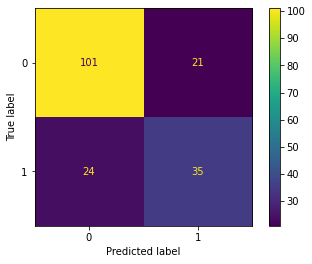

In [38]:
cm = confusion_matrix(y_test, y_pred, labels=grid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=grid.classes_)
disp.plot()

plt.show()

In [39]:
#Classification report - Model 2
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       122
           1       0.62      0.59      0.61        59

    accuracy                           0.75       181
   macro avg       0.72      0.71      0.71       181
weighted avg       0.75      0.75      0.75       181



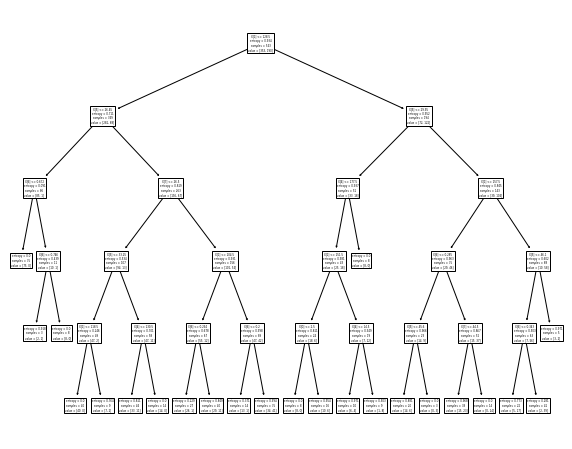

In [40]:
plt.figure(figsize=(10,8))
tree.plot_tree(model_cv)
plt.show()

In [43]:
# Save best model

filename = '../models/final_model.sav'
pickle.dump(model_cv, open(filename, 'wb'))

La optimizacion de hiperparametros por crossvalidation, ayudo a mejorar la accuracy a 75%.
Quizas con un modelo de random forest podriamos mejorar las metricas aun mas en la prediccion de la diabetes